In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
from metamod.utils import ResultsManager, single_task_plot, task_switch_plot, cat_assimilation_plot

In [5]:
semantic_dir_list = glob.glob("../results/two_layer_linear/run_id_*_Semantic*")
mnist_dir_list = glob.glob("../results/two_layer_linear/run_id_*_MNIST*")
gaussian_dir_list = glob.glob("../results/two_layer_linear/run_id_*_AffineCorrelatedGaussian*")

In [6]:
semantic_dir_list, mnist_dir_list, gaussian_dir_list

(['../results/two_layer_linear/run_id_3_Semantic_27-12-2022_19-43-07-337',
  '../results/two_layer_linear/run_id_4_Semantic_27-12-2022_19-42-05-912',
  '../results/two_layer_linear/run_id_0_Semantic_27-12-2022_19-41-49-223',
  '../results/two_layer_linear/run_id_1_Semantic_27-12-2022_19-41-46-038',
  '../results/two_layer_linear/run_id_2_Semantic_27-12-2022_19-43-13-130'],
 ['../results/two_layer_linear/run_id_0_MNIST_27-12-2022_21-08-53-766',
  '../results/two_layer_linear/run_id_3_MNIST_27-12-2022_21-10-40-696',
  '../results/two_layer_linear/run_id_2_MNIST_27-12-2022_21-10-37-361',
  '../results/two_layer_linear/run_id_1_MNIST_27-12-2022_21-08-57-214',
  '../results/two_layer_linear/run_id_4_MNIST_27-12-2022_21-09-28-852'],
 ['../results/two_layer_linear/run_id_3_AffineCorrelatedGaussian_27-12-2022_18-42-03-639',
  '../results/two_layer_linear/run_id_1_AffineCorrelatedGaussian_27-12-2022_18-40-53-066',
  '../results/two_layer_linear/run_id_0_AffineCorrelatedGaussian_27-12-2022_18-41

In [7]:
results = []
for result_dir in mnist_dir_list:
    results.append(ResultsManager(result_dir))

In [8]:
results[-2].show_keys()

### Results from ../results/two_layer_linear/run_id_1_MNIST_27-12-2022_21-08-57-214 ###
### Param Keys ###
--- dataset_params ---
batch_size, new_shape, subset, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_g, control_lr, in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iters_sim', 'time_span', 'W1_t_eq', 'W2_t_eq', 'Loss_t_eq', 'W1_t_control_init', 'W2_t_control_init', 'Loss_t_control_in

In [9]:
results[-1].results.keys()
results[-1].params["model_params"]

{'learning_rate': 0.005,
 'hidden_dim': 50,
 'intrinsic_noise': 0.0,
 'reg_coef': 0.0,
 'W1_0': None,
 'W2_0': None,
 'input_dim': 26,
 'output_dim': 2,
 'model': <metamod.networks.linear_net.LinearNet at 0x7fef17e7a830>}

In [8]:
results[-1].plot_loss()
results[-1].plot_control_optimization()

# Single tasks plots

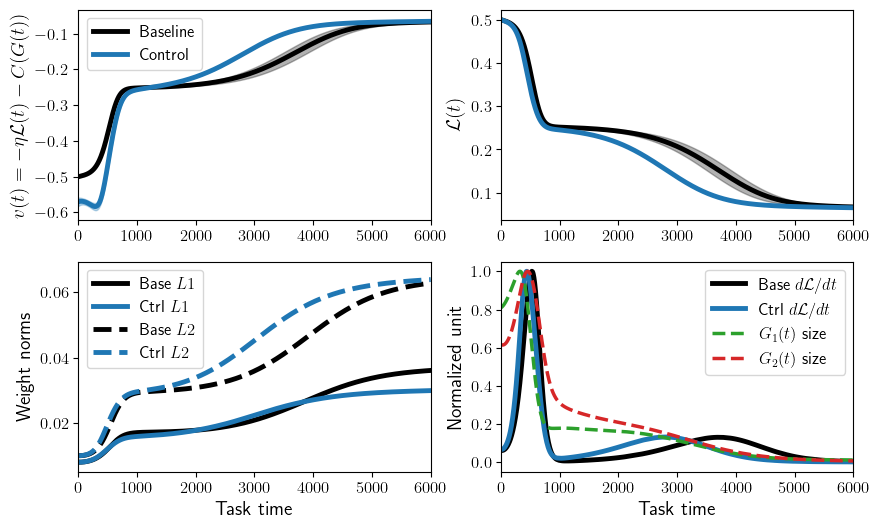

In [9]:
f, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
ax = single_task_plot(results, ax=ax, fontsize=14, line_width=3.5, x_lim=(0, 6000), skip_xlabel=True, label_in_title=False)
# plt.savefig("paper_figures/single_task_mnist.pdf", bbox_inches="tight")

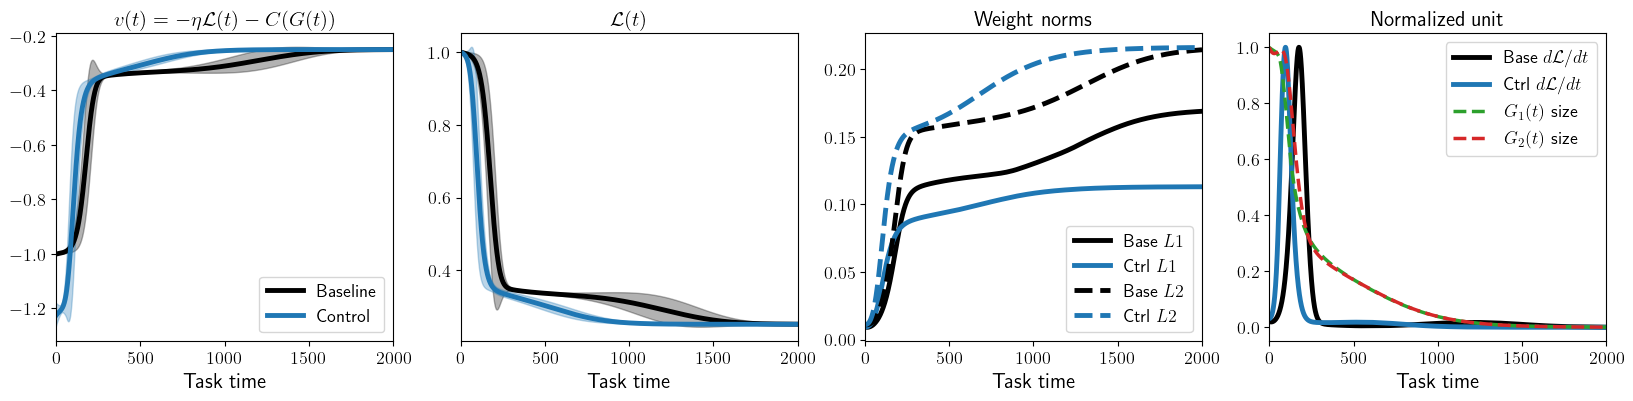

In [10]:
results = []
for result_dir in gaussian_dir_list:
    results.append(ResultsManager(result_dir))

f, ax = plt.subplots(1, 4, figsize=(20, 4))
ax = ax.flatten()
ax = single_task_plot(results, ax=ax, fontsize=15, line_width=3.5, x_lim=(0, 2000), skip_xlabel=False, label_in_title=True)
plt.savefig("paper_figures/single_task_gaussian.pdf", bbox_inches="tight")

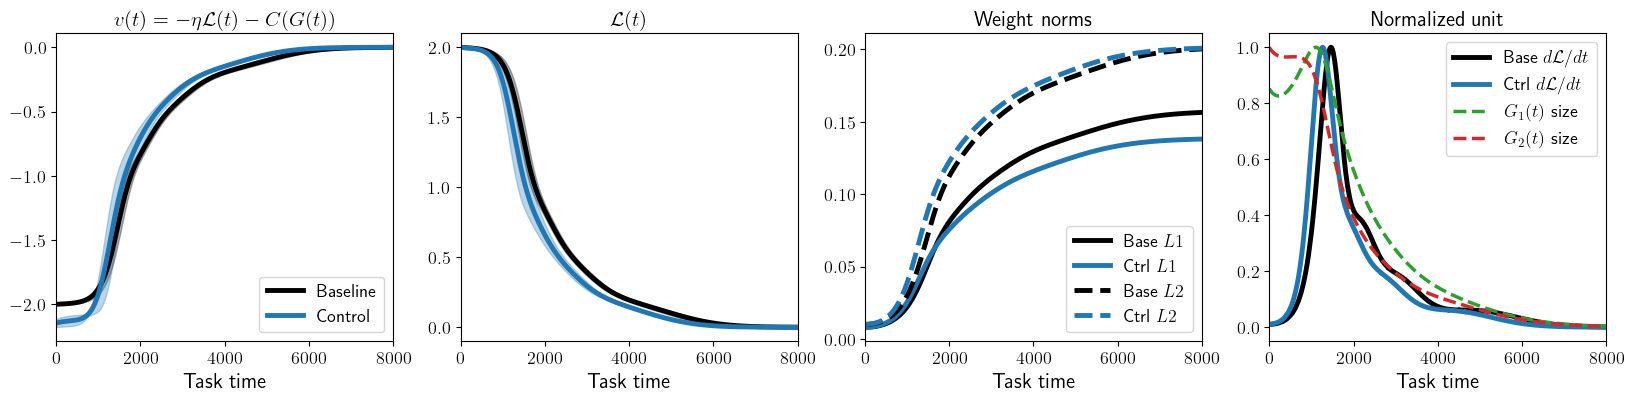

In [11]:
results = []
for result_dir in semantic_dir_list:
    results.append(ResultsManager(result_dir))

f, ax = plt.subplots(1, 4, figsize=(20, 4))
ax = ax.flatten()
ax = single_task_plot(results, ax=ax, fontsize=15, line_width=3.5, x_lim=(0, 8000), skip_xlabel=False, label_in_title=True)
plt.savefig("paper_figures/single_task_semantic.pdf", bbox_inches="tight")

# Task switch plot

In [12]:
results_path = "../results/task_switch_main/slow_switch_run0_AffineCorrelatedGaussian_27-12-2022_20-36-08-225"
results = ResultsManager(results_path, verbose=True)

### Results from ../results/task_switch_main/slow_switch_run0_AffineCorrelatedGaussian_27-12-2022_20-36-08-225 ###
### Param Keys ###
--- dataset_params ---
dataset1_params, dataset2_params, dataset_classes, change_tasks_every, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, change_task_every, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_g, control_lr, in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, change_task_every, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iters_sim', 'ti

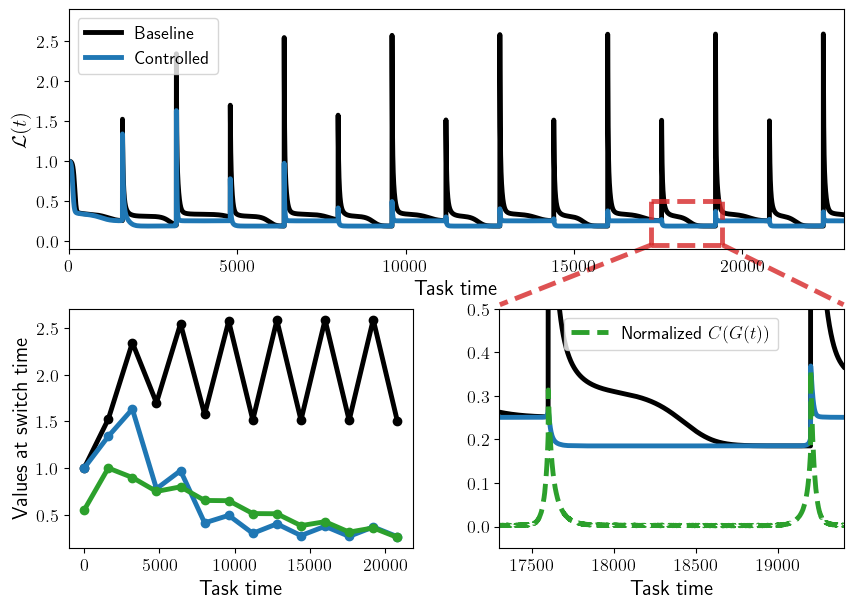

In [13]:
figsize = (10, 7)
fontsize = 15
line_width = 3.5
zoom_xlim = (17300, 19400)
zoom_ylim = (-0.05, 0.5)

task_switch_plot(results, figsize=figsize, fontsize=fontsize, line_width=line_width, zoom_xlim=zoom_xlim, zoom_ylim=zoom_ylim)
plt.savefig("paper_figures/task_switch.pdf", bbox_inches="tight")

# Category assimilation

In [14]:
results_path1 = "../results/category_assimilation/run_id_2_Semantic_06-01-2023_00-01-58-134"
results_path2 = "../results/category_assimilation/run_id_2_Semantic_06-01-2023_00-01-58-134"

In [15]:
results = [ResultsManager(results_path1, verbose=True), ResultsManager(results_path1, verbose=True)]

### Results from ../results/category_assimilation/run_id_2_Semantic_06-01-2023_00-01-58-134 ###
### Param Keys ###
--- dataset_params ---
batch_size, h_levels, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_g, control_lr, control_base, update_first_layer, update_second_layer, degree_of_control, in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iters_sim', 'time_span', 'W1_t_eq', 'W2_t_eq', 

In [16]:
figsize = (10, 7)
fontsize = 15
line_width = 3.5

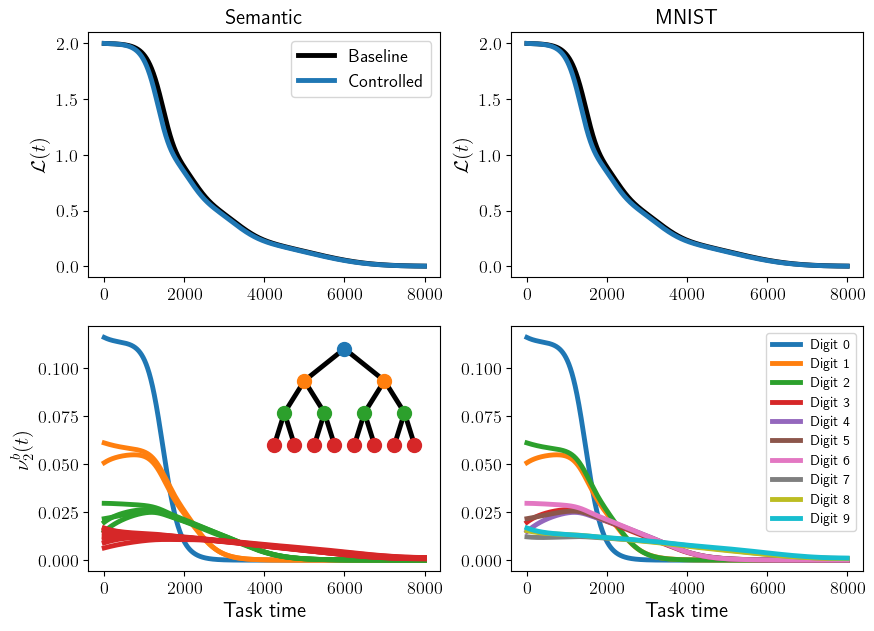

In [17]:
cat_assimilation_plot(results[0], results[1], figsize=figsize, fontsize=fontsize, line_width=line_width)
plt.savefig("paper_figures/category_assimilation.pdf", bbox_inches="tight")